In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def make_list():
    l = []
    for i in range(100):
        if i < 100: 
            l.append(i)
    return l
    
list = make_list()

In [3]:
round(np.std(list, ddof=1), 3)

29.011

In [35]:
games = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/analytics_practice/statistics/data/games.csv')

In [5]:
games.dropna(axis='index', inplace=True)

In [6]:
games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
# Выведите описательные характеристики переменной Year и постройте график 
# распределения количества выпущенных игр по годам.

print('mean = ' + str(games.Year.mean()))
print('median = ' + str(games.Year.median()))
print('mode = ' + str(games.Year.mode()))
games.Year.describe()

mean = 2006.4055613528942
median = 2007.0
mode = 0    2009.0
dtype: float64


count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [9]:
# На каких платформах произошло больше всего релизов?
# Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. 
# Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом. 

games_platforms = games.groupby('Platform').size().to_frame().sort_values(by=0, ascending=False)
games_platforms.rename(columns={0: 'frequency'}, inplace=True)
games_platforms.frequency = games_platforms.frequency / games_platforms.frequency.sum()
games_platforms.dtypes
print(games_platforms.query('frequency > 0.07').index)

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS'], dtype='object', name='Platform')


In [10]:
# Игры каких издателей (Publisher) встречаются в датасете чаще всего?

games_publishers = games.groupby('Publisher').size().to_frame().sort_values(by=0, ascending=False)
games_publishers

,0
Publisher,
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,918
Konami Digital Entertainment,823
...,...
Ertain,1
Epic Games,1
Seventh Chord,1


In [19]:
# Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр 
# данного издателя в разных регионах (NA, EU, JP, Other). 
# В каком регионе медианное значение объема продаж является наибольшим?

def calc_nintendo_statistics(column_name):
    print(column_name + ' mean = ' + str(games.query('Publisher == "Nintendo"')[column_name].mean()))
    print(column_name + ' median = ' + str(games.query('Publisher == "Nintendo"')[column_name].median()))
    print(column_name + ' std = ' + str(games.query('Publisher == "Nintendo"')[column_name].std()))
    
calc_nintendo_statistics('NA_Sales')
calc_nintendo_statistics('EU_Sales')
calc_nintendo_statistics('JP_Sales')
calc_nintendo_statistics('Other_Sales')

games.query('Publisher == "Nintendo"').describe()

NA_Sales mean = 1.1720545977011492
NA_Sales median = 0.375
NA_Sales std = 2.9899128164968642
EU_Sales mean = 0.6010057471264366
EU_Sales median = 0.12
EU_Sales std = 1.743953375382063
JP_Sales mean = 0.6537212643678161
JP_Sales median = 0.28
JP_Sales std = 1.063110044538652
Other_Sales mean = 0.13676724137931034
Other_Sales median = 0.03
Other_Sales std = 0.4641703766411941


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


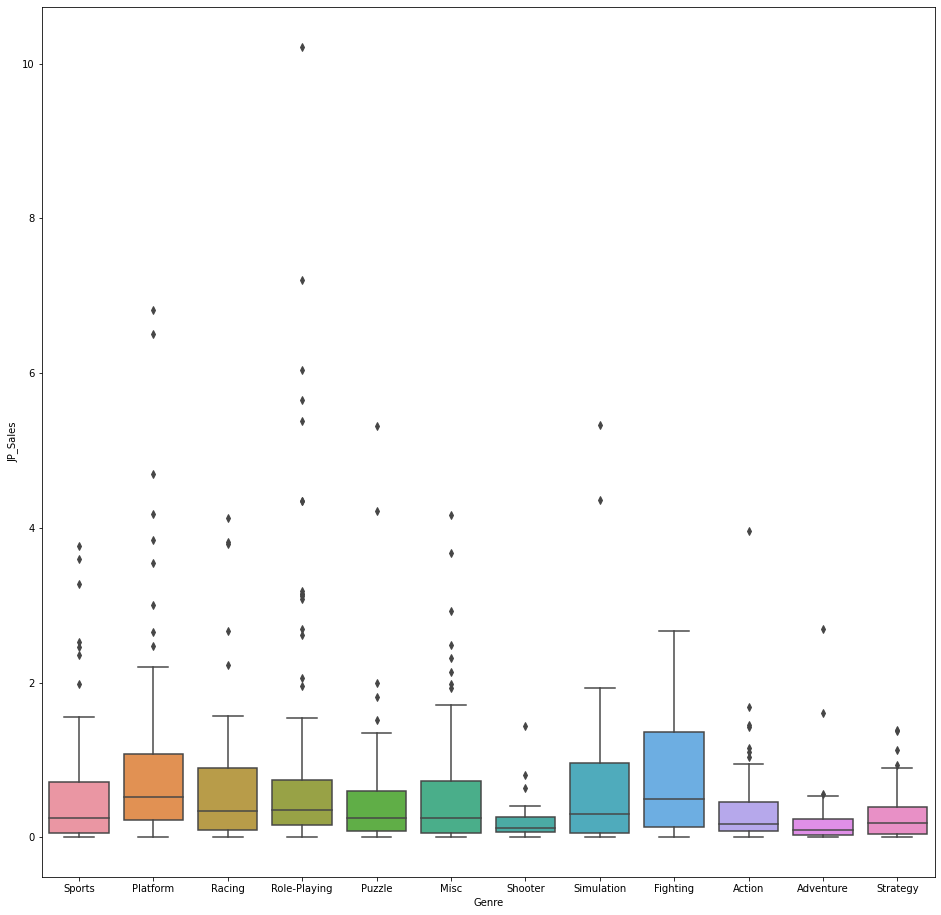

In [55]:
# Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

#     по оси x будет расположен жанр игры (Genre)
#     по оси у – объем продаж в Японии (JP_sales)

# Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

# games.rename(columns={'Genre': 'genre', 'JP_Sales': 'jp_sales'}, inplace = True)

games_jp_genre = games.query('Publisher == "Nintendo"')
plt.figure(figsize=(16,16))
sns.boxplot(data=games_jp_genre, x="Genre", y="JP_Sales")

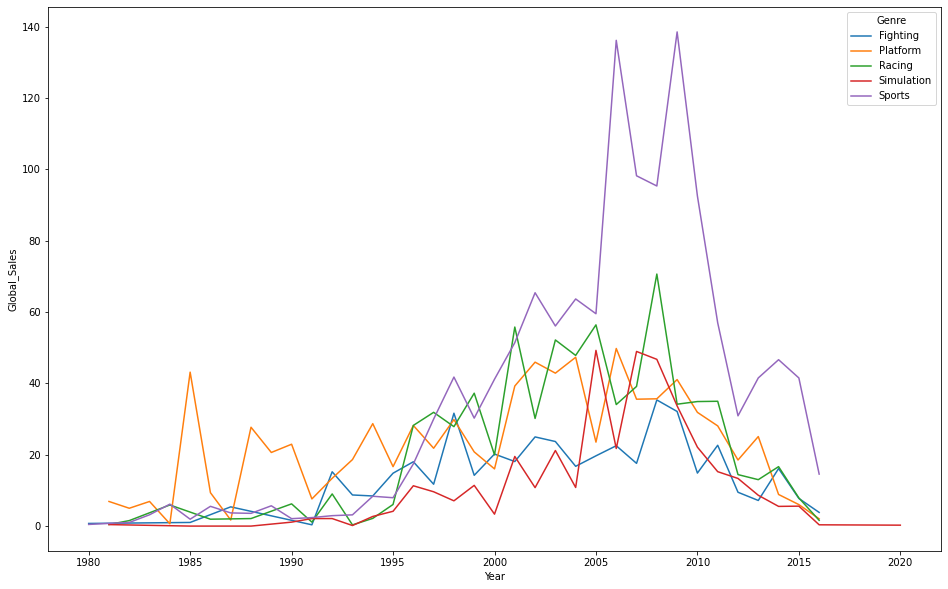

In [69]:
# Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo 
# следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

genre_list = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']
games_selected_genres_grouped = games[games['Genre'].isin(genre_list)].groupby(['Genre', 'Year']).agg({'Global_Sales': 'sum'})
plt.figure(figsize=(16,10))
sns.lineplot(data=games_selected_genres_grouped, x='Year', y='Global_Sales', hue='Genre')

In [33]:
games.head()

,Rank,Name,Platform,Year,genre,Publisher,NA_Sales,EU_Sales,jp_sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [64]:
?? sns.lineplot